# 1. 클러스터링

In [1]:
import pandas as pd
import numpy as np
import math

#Visualizing
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'; plt.rcParams['axes.unicode_minus'] = False;
import seaborn as sns; #sns.set_style('whitegrid')

#Time Series Analysis
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, ccf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Clustering (+α)
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
from minisom import MiniSom

#Modeling
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

#System
from ipywidgets import interact
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')


In [2]:
%matplotlib inline

## 경기도 클러스터링

In [81]:
data = pd.read_csv('아파트매매가격지수_경기도.csv',index_col=0)
data


,2013-01-01,2013-02-01,2013-03-01,2013-04-01,2013-05-01,2013-06-01,2013-07-01,2013-08-01,2013-09-01,2013-10-01,...,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01
행정구역별,,,,,,,,,,,,,,,,,,,,,
수원시,63.4,63.3,63.2,63.3,63.4,63.5,63.4,63.2,63.2,63.4,...,97.3,100.0,102.4,104.7,106.5,108.4,109.5,109.8,109.8,109.6
성남시,67.8,67.2,66.9,67.1,67.5,67.9,67.7,67.4,67.4,67.5,...,99.1,100.0,101.3,102.6,103.6,104.3,104.8,105.1,105.1,105.0
의정부시,77.7,77.4,76.9,76.4,76.4,76.2,75.5,75.2,75.1,75.2,...,97.2,100.0,101.8,103.8,105.2,106.5,107.2,107.4,107.4,107.3
안양시,60.5,60.2,60.0,59.8,59.6,59.5,59.5,59.4,59.5,59.8,...,95.2,100.0,103.2,106.2,108.3,110.5,111.7,112.0,111.8,111.6
부천시,68.1,67.7,67.4,67.4,67.6,67.6,67.5,67.2,67.2,67.8,...,97.2,100.0,102.0,104.5,106.7,108.7,110.2,110.8,110.8,110.7
광명시,53.0,52.9,52.6,52.6,52.9,53.0,53.1,52.9,53.1,53.1,...,98.4,100.0,102.0,104.0,105.5,106.7,107.3,107.4,107.3,107.3
평택시,92.6,92.5,92.4,92.4,92.4,92.6,92.5,92.3,92.3,92.4,...,95.2,100.0,103.0,106.2,108.8,111.7,113.2,114.1,114.3,114.3
동두천시,92.6,90.9,90.1,90.0,89.8,89.6,89.3,89.0,88.9,89.0,...,97.2,100.0,102.0,104.5,106.4,107.3,107.7,107.5,107.5,107.4
안산시,66.8,66.6,66.3,66.3,66.6,66.8,66.7,66.5,66.6,66.9,...,95.0,100.0,102.8,105.0,107.1,109.3,110.7,111.2,111.3,111.3


In [82]:
# 클러스터 돌리기 전 변수를 생성 
df = data.copy()


## 군집 개수 정하기

### 1. elbow method 

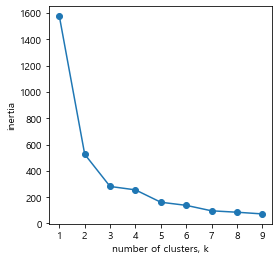

In [83]:
# 적절한 군집수 찾기 
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수) 
ks = range(1,10) 
inertias = [] 
for k in ks: 
    model = TimeSeriesKMeans(n_clusters=k, metric="dtw",random_state = 2022)
    model.fit(df) 
    inertias.append(model.inertia_) 
    # Plot ks vs inertias 
plt.figure(figsize=(4, 4)) 
plt.plot(ks, inertias, '-o') 
plt.xlabel('number of clusters, k') 
plt.ylabel('inertia') 
plt.xticks(ks) 
plt.show()



### 2. silhouette 계수

In [84]:
import numpy as np
from sklearn.metrics import silhouette_samples
from sklearn.datasets import make_blobs
from matplotlib import cm

def plotSilhouette(X, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)

        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
                edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)

    silhoutte_avg = np.mean(silhouette_vals)
    plt.axvline(silhoutte_avg, color = 'red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('K')
    plt.xlabel('실루엣 계수')
    plt.show()


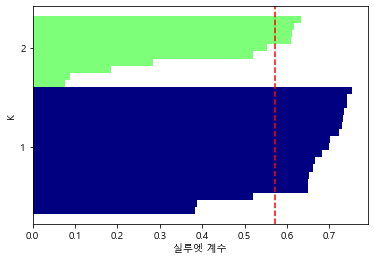

In [85]:
k= 2

X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5,
                  shuffle=True, random_state=0)
km = TimeSeriesKMeans(n_clusters=k, metric="dtw",random_state = 2022)
y_km = km.fit_predict(df)
plotSilhouette(df, y_km)

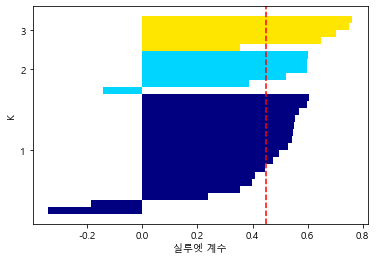

In [86]:
k= 3

X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5,
                  shuffle=True, random_state=0)
km = TimeSeriesKMeans(n_clusters=k, metric="dtw",random_state = 2022)
y_km = km.fit_predict(df)
plotSilhouette(df, y_km)

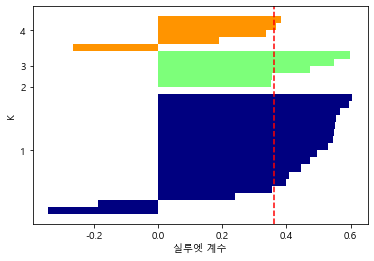

In [87]:
k= 4

X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5,
                  shuffle=True, random_state=0)
km = TimeSeriesKMeans(n_clusters=k, metric="dtw",random_state = 2022)
y_km = km.fit_predict(df)
plotSilhouette(df, y_km)

## 클러스터별 저장

In [88]:
# K-Means 모델과 군집 예측값을 생성 
# 클러스터 모델 생성 파라미터는 원할 경우 추가 
model =  TimeSeriesKMeans(n_clusters=3, metric="dtw", random_state = 2022)
                     # 클러스터 갯수 
                     # , n_init=10 
                     # initial centroid를 몇번 샘플링한건지, 데이터가 많으면 많이 돌릴수록안정화된 결과가 나옴 
                     # , max_iter=500 # KMeans를 몇번 반복 수행할건지, K가 큰 경우 1000정도로 높여준다 
                     #random_state = 42 # , algorithm='auto' ) 
 # 생성한 모델로 데이터를 학습시킴 
model.fit(df) # unsupervised learning 
# 결과 값을 변수에 저장 
df['cluster'] = model.fit_predict(df)

In [89]:
df.to_csv('경기도_clustered.csv',encoding='utf-8')

In [90]:
df0= df.loc[df['cluster'] == 0]
df0.to_csv('cluster0.csv',encoding='utf-8')
df0

,2013-01-01,2013-02-01,2013-03-01,2013-04-01,2013-05-01,2013-06-01,2013-07-01,2013-08-01,2013-09-01,2013-10-01,...,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01,cluster
행정구역별,,,,,,,,,,,,,,,,,,,,,
수원시,63.4,63.3,63.2,63.3,63.4,63.5,63.4,63.2,63.2,63.4,...,100.0,102.4,104.7,106.5,108.4,109.5,109.8,109.8,109.6,0
성남시,67.8,67.2,66.9,67.1,67.5,67.9,67.7,67.4,67.4,67.5,...,100.0,101.3,102.6,103.6,104.3,104.8,105.1,105.1,105.0,0
안양시,60.5,60.2,60.0,59.8,59.6,59.5,59.5,59.4,59.5,59.8,...,100.0,103.2,106.2,108.3,110.5,111.7,112.0,111.8,111.6,0
부천시,68.1,67.7,67.4,67.4,67.6,67.6,67.5,67.2,67.2,67.8,...,100.0,102.0,104.5,106.7,108.7,110.2,110.8,110.8,110.7,0
광명시,53.0,52.9,52.6,52.6,52.9,53.0,53.1,52.9,53.1,53.1,...,100.0,102.0,104.0,105.5,106.7,107.3,107.4,107.3,107.3,0
안산시,66.8,66.6,66.3,66.3,66.6,66.8,66.7,66.5,66.6,66.9,...,100.0,102.8,105.0,107.1,109.3,110.7,111.2,111.3,111.3,0
고양시,69.5,69.0,68.6,68.1,68.1,68.0,67.9,67.9,68.1,68.5,...,100.0,101.4,103.1,105.0,106.7,107.6,108.0,108.1,108.0,0
과천시,63.4,63.1,63.2,64.5,64.8,64.6,64.3,64.0,64.0,64.5,...,100.0,100.8,101.8,102.3,102.6,103.1,103.5,103.4,103.4,0
구리시,58.9,58.3,58.0,58.1,58.3,58.4,58.3,58.2,58.2,58.6,...,100.0,101.2,102.7,104.0,105.3,106.2,106.4,106.3,106.3,0


In [91]:
df1= df.loc[df['cluster'] == 1]

df1.to_csv('cluster1.csv',encoding='utf-8')
df1


,2013-01-01,2013-02-01,2013-03-01,2013-04-01,2013-05-01,2013-06-01,2013-07-01,2013-08-01,2013-09-01,2013-10-01,...,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01,cluster
행정구역별,,,,,,,,,,,,,,,,,,,,,
평택시,92.6,92.5,92.4,92.4,92.4,92.6,92.5,92.3,92.3,92.4,...,100.0,103.0,106.2,108.8,111.7,113.2,114.1,114.3,114.3,1
동두천시,92.6,90.9,90.1,90.0,89.8,89.6,89.3,89.0,88.9,89.0,...,100.0,102.0,104.5,106.4,107.3,107.7,107.5,107.5,107.4,1
이천시,89.2,89.4,89.7,90.1,90.4,90.6,90.7,90.8,91.0,91.5,...,100.0,101.6,103.3,105.3,107.8,110.3,112.3,113.3,114.2,1
안성시,92.6,92.8,92.8,93.5,93.8,94.1,94.3,94.4,94.7,95.3,...,100.0,103.7,106.9,109.9,112.6,114.8,116.1,116.9,117.0,1
여주시,102.8,102.8,102.7,102.7,103.6,103.8,103.9,103.8,103.8,104.3,...,100.0,101.1,102.4,103.5,105.2,106.6,107.2,107.1,107.1,1
포천시,93.6,93.6,93.6,93.9,94.7,95.1,94.7,94.2,93.8,94.1,...,100.0,101.6,103.7,105.8,107.3,108.4,109.0,109.2,109.3,1


In [92]:
df2= df.loc[df['cluster'] == 2]
df2.to_csv('cluster2.csv',encoding='utf-8')
df2

,2013-01-01,2013-02-01,2013-03-01,2013-04-01,2013-05-01,2013-06-01,2013-07-01,2013-08-01,2013-09-01,2013-10-01,...,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01,cluster
행정구역별,,,,,,,,,,,,,,,,,,,,,
의정부시,77.7,77.4,76.9,76.4,76.4,76.2,75.5,75.2,75.1,75.2,...,100.0,101.8,103.8,105.2,106.5,107.2,107.4,107.4,107.3,2
파주시,82.3,81.9,81.6,80.6,80.7,80.3,80.0,80.0,80.4,80.7,...,100.0,101.1,103.1,104.7,105.9,106.9,107.2,107.5,107.8,2
광주시,82.4,82.0,81.9,82.3,82.3,82.2,81.9,81.6,81.4,81.5,...,100.0,101.8,104.1,105.4,106.8,107.9,108.4,108.7,108.7,2
양주시,82.0,81.7,81.4,81.7,81.9,82.1,81.4,81.0,81.0,81.3,...,100.0,101.8,104.2,106.4,108.5,109.5,109.8,109.8,109.7,2
오산시,83.2,83.0,82.9,82.9,82.9,82.4,82.1,81.9,81.7,81.8,...,100.0,103.5,107.3,110.7,114.1,115.9,116.7,116.8,116.6,2


## 클러스터별 상관관계

In [93]:
data_S = pd.read_csv('서울시 가격지수.csv',index_col = 0)
data_S = data_S.T
data_S

date,seoul
2013-01-01,73.5
2013-02-01,73.2
2013-03-01,73.1
2013-04-01,73.2
2013-05-01,73.4
...,...
2021-10-01,103.5
2021-11-01,104.1
2021-12-01,104.4
2022-01-01,104.4


In [95]:
data_S['cluster1'] = df0.mean()
data_S['cluster2'] = df1.mean()
data_S['cluster3'] = df2.mean()
data_S

date,seoul,cluster1,cluster2,cluster3
2013-01-01,73.5,65.241176,93.900000,81.52
2013-02-01,73.2,64.923529,93.666667,81.20
2013-03-01,73.1,64.729412,93.550000,80.94
2013-04-01,73.2,64.823529,93.766667,80.78
2013-05-01,73.4,65.029412,94.116667,80.84
...,...,...,...,...
2021-10-01,103.5,107.658824,108.650000,108.36
2021-11-01,104.1,108.641176,110.166667,109.48
2021-12-01,104.4,108.958824,111.033333,109.90
2022-01-01,104.4,108.911765,111.383333,110.04


In [102]:
sns.set(style="whitegrid", font_scale=1, font='Malgun Gothic')
%matplotlib inline

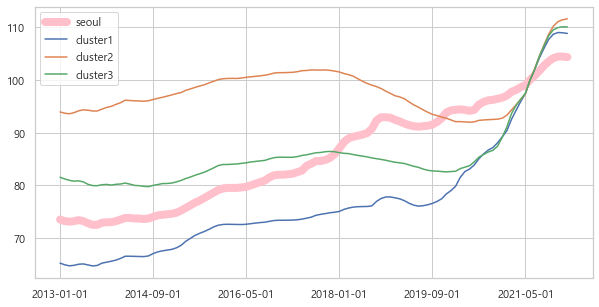

In [103]:
data_S['seoul'].plot(figsize=(10, 5),color='pink',lw=8)
data_S['cluster1'].plot(figsize=(10, 5))
data_S['cluster2'].plot(figsize=(10, 5))
data_S['cluster3'].plot(figsize=(10, 5))
plt.legend()

In [97]:
data_S.corr()

date,seoul,cluster1,cluster2,cluster3
date,,,,
seoul,1.000000,0.906129,0.227910,0.752634
cluster1,0.906129,1.000000,0.433593,0.938020
cluster2,0.227910,0.433593,1.000000,0.669636
cluster3,0.752634,0.938020,0.669636,1.000000


In [99]:
data_S[-60:].corr()

date,seoul,cluster1,cluster2,cluster3
date,,,,
seoul,1.000000,0.912014,0.162113,0.748225
cluster1,0.912014,1.000000,0.448878,0.935840
cluster2,0.162113,0.448878,1.000000,0.724722
cluster3,0.748225,0.935840,0.724722,1.000000


In [101]:
data_S[-54:].corr()

date,seoul,cluster1,cluster2,cluster3
date,,,,
seoul,1.000000,0.942108,0.343421,0.818276
cluster1,0.942108,1.000000,0.547551,0.946783
cluster2,0.343421,0.547551,1.000000,0.777230
cluster3,0.818276,0.946783,0.777230,1.000000


In [100]:
data_S[-48:].corr()

date,seoul,cluster1,cluster2,cluster3
date,,,,
seoul,1.000000,0.981765,0.600982,0.916670
cluster1,0.981765,1.000000,0.673189,0.962142
cluster2,0.600982,0.673189,1.000000,0.838526
cluster3,0.916670,0.962142,0.838526,1.000000


In [98]:
data_S[-24:].corr()

date,seoul,cluster1,cluster2,cluster3
date,,,,
seoul,1.000000,0.994122,0.977323,0.993966
cluster1,0.994122,1.000000,0.962383,0.998395
cluster2,0.977323,0.962383,1.000000,0.968337
cluster3,0.993966,0.998395,0.968337,1.000000


In [106]:
data_S[-12:].corr()

date,seoul,cluster1,cluster2,cluster3
date,,,,
seoul,1.000000,0.994808,0.999155,0.998851
cluster1,0.994808,1.000000,0.993462,0.997888
cluster2,0.999155,0.993462,1.000000,0.998233
cluster3,0.998851,0.997888,0.998233,1.000000
